#### Making Market Timming

In [52]:
def making_mt(start,end,code):
    from pykrx import stock
    df = stock.get_index_fundamental(start,end,code)
    df = df.drop(['등락률','PER','선행PER','PBR','배당수익률'],axis=1)
    if code=='1001':
        df['sma20'] = df['종가'].rolling(20).mean()
        df['mt'] = df['종가']>df['sma20']
        df = df.dropna()
        return df
    elif code=='2001':     
        df['sma3'] = df['종가'].rolling(3).mean()
        df['sma5'] = df['종가'].rolling(5).mean()
        df['sma10'] = df['종가'].rolling(10).mean()
        df['mt'] = ((df['종가']>df['sma3'])|(df['종가']>df['sma5'])|(df['종가']>df['sma10']))
        df = df.dropna()
        return df
    else:
        print('올바른 종목 code 입력')

In [53]:
def making_mt_plot(df,code):
    import matplotlib.pyplot as plt
    from matplotlib import dates
    if code=='1001': 
        plt.figure(figsize = (50, 10))
        plt.title("Kospi Market timming")
        plt.plot(df["종가"])
        plt.plot(df['sma20'])
        plt.scatter(df.loc[df['mt']==1].index, df['종가'][df['mt']==1],
                    color = 'red',
                    label='Go',
                    marker ='^',
                    alpha=0.8)
        plt.scatter(df.loc[df['mt']==0].index, df['종가'][df['mt']==0],
                    color = 'blue',
                    label='Stop',
                    marker ='v',
                    alpha=0.8)
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    elif code=='2001':
        plt.figure(figsize = (50, 10))
        plt.title("Kosdaq Market timming")
        plt.plot(df["종가"])
        plt.plot(df['sma3'])
        plt.plot(df['sma5'])
        plt.plot(df['sma10'])
        plt.scatter(df.loc[df['mt']==1].index, df['종가'][df['mt']==1],
                    color = 'red',
                    label='Go',
                    marker ='^',
                    alpha=0.8)
        plt.scatter(df.loc[df['mt']==0].index, df['종가'][df['mt']==0],
                    color = 'blue',
                    label='Stop',
                    marker ='v',
                    alpha=0.8)
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
    else:
        print('Error : Code check')
    

In [75]:
test = making_mt('20180116','20221229','2001')

In [78]:
test.to_csv('5years_kosdaq_mt.csv')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.


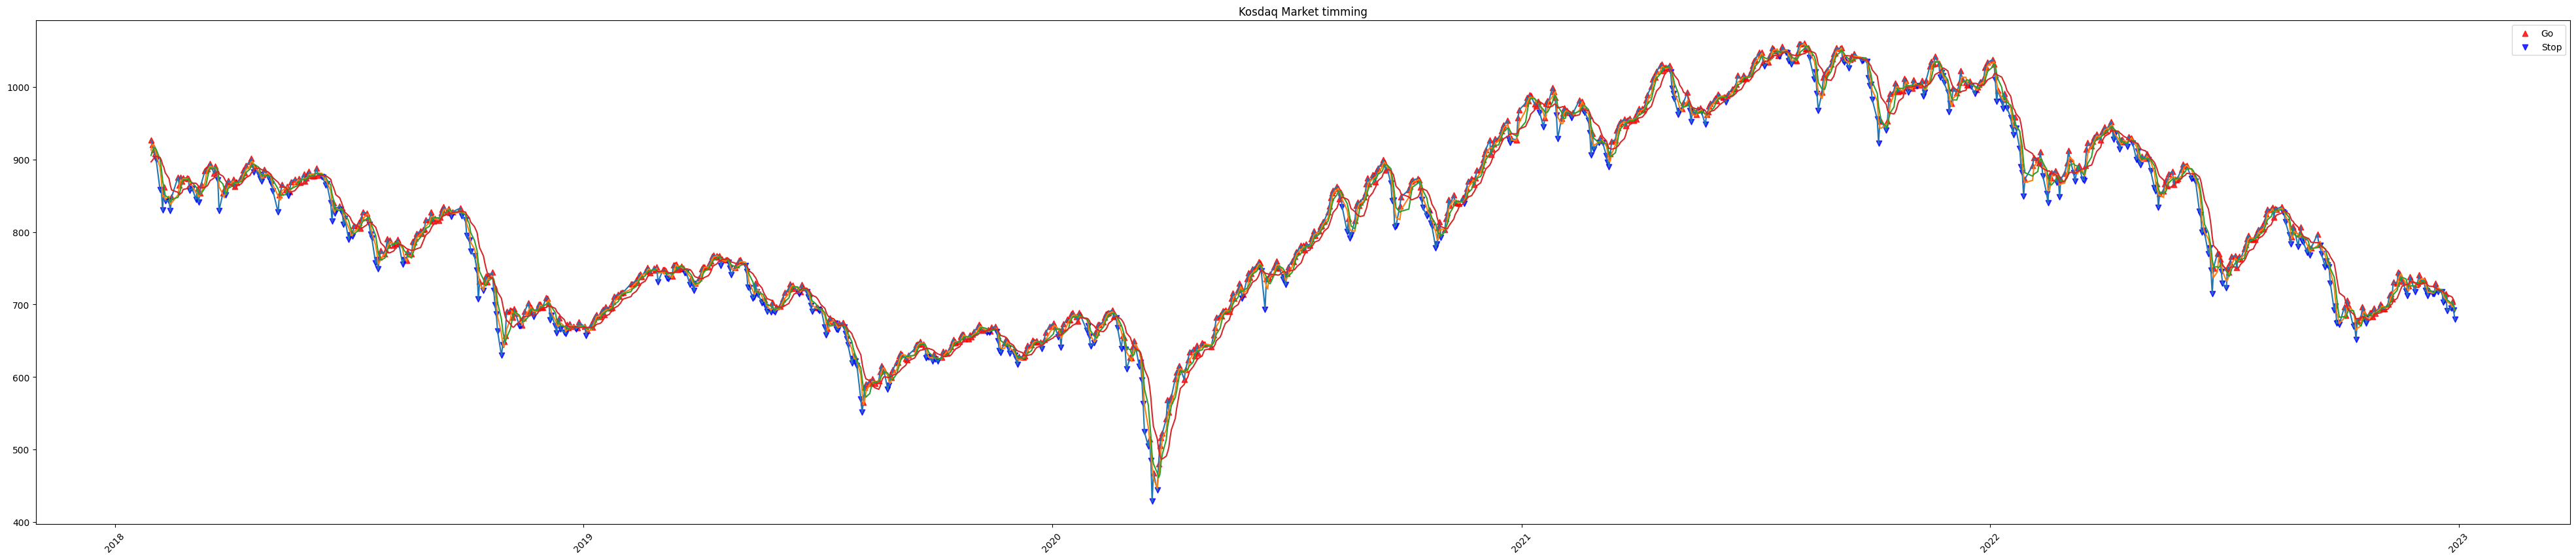

In [80]:
making_mt_plot(test,'2001')